# Airline Dataset 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
air = pd.read_excel("D:\DATA SCIENCE\ASSIGNMENTS\Forecasting\Airlines+Data.xlsx")

In [3]:
air

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
air.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [6]:
air.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [7]:
air["Date"] = pd.to_datetime(air.Month,format="%b-%y")
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

air["month"] = air.Date.dt.strftime("%b") # month extraction
air["year"] = air.Date.dt.strftime("%Y") # year extraction


### HeatMap 

<AxesSubplot:xlabel='month', ylabel='year'>

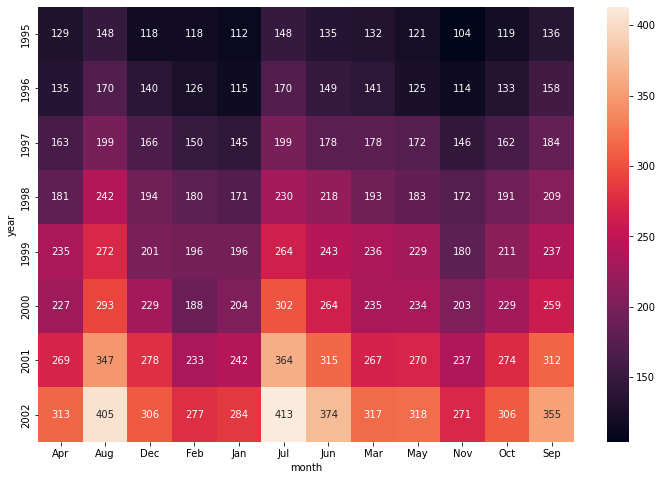

In [8]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=air,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

### Line Plot 

<AxesSubplot:>

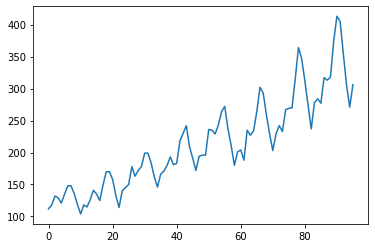

In [9]:
air.Passengers.plot() 


### Histogram Plot 

<AxesSubplot:>

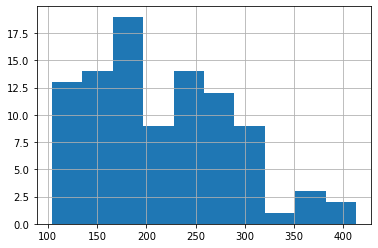

In [10]:
air.Passengers.hist()

### Density Plot

<AxesSubplot:ylabel='Density'>

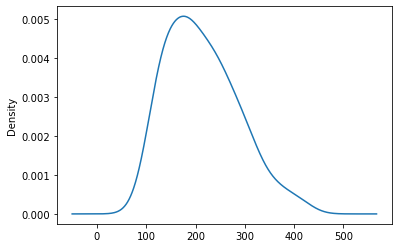

In [11]:
air.Passengers.plot(kind='kde')

### Lag Plot

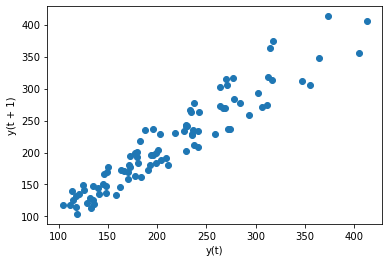

In [12]:
from pandas.plotting import lag_plot
lag_plot(air.Passengers)
plt.show()

### Autocorrelation plot (ACF) and Partial Autocorrelation plot(PACF)

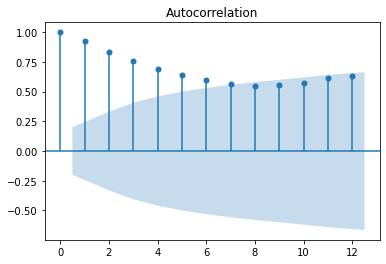

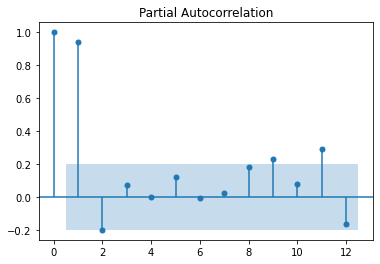

In [13]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(air.Passengers,lags=12)
tsa_plots.plot_pacf(air.Passengers,lags=12)
plt.show()

### Box Plot 

<AxesSubplot:xlabel='year', ylabel='Passengers'>

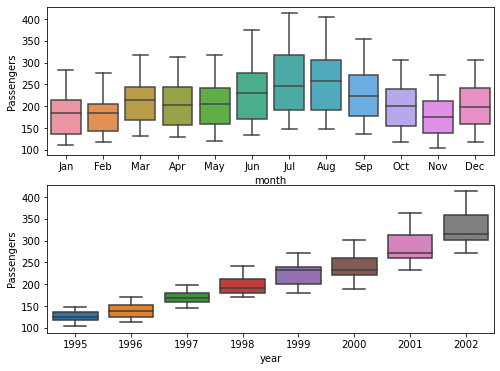

In [14]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=air)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=air)


C:\Users\ISHIKA\AppData\Local\Temp/ipykernel_21948/2619076696.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air['month'][i]= a[0:3]


<AxesSubplot:>

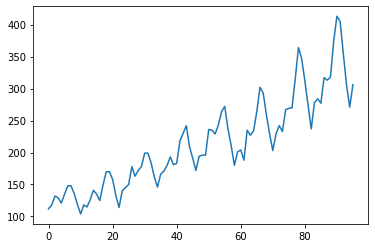

In [15]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
import numpy as np
a = air["month"][0]
a[0:3]
air['Month']= 0

for i in range(96):
    a = air["month"][i]
    air['month'][i]= a[0:3]
    
month_dummies = pd.DataFrame(pd.get_dummies(air['month']))
air1 = pd.concat([air.Passengers,month_dummies],axis = 1)

air1["t"] = np.arange(1,97)

air1["t_squared"] = air1["t"]*air1["t"]
air1.columns
air1["log_Passengers"] = np.log(air1["Passengers"])
air1.rename(columns={"Passengers ": 'Passengers'}, inplace=True)
air1.Passengers.plot()

In [16]:
air1

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,271,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


<AxesSubplot:xlabel='year', ylabel='Passengers'>

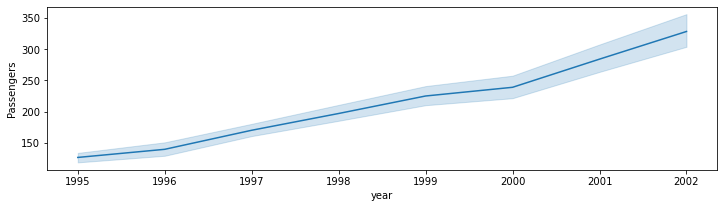

In [17]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year", y="Passengers",data=air)

### Moving Average 

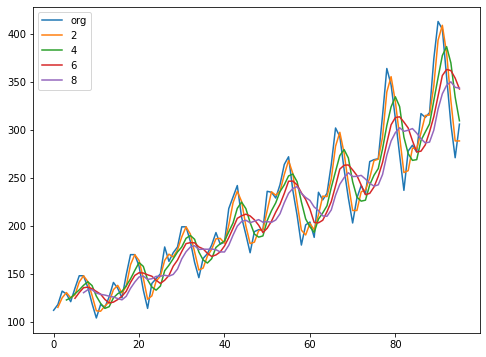

In [18]:
plt.figure(figsize=(8,6))
air.Passengers.plot(label="org")
for i in range(2,10,2):
    air["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

<AxesSubplot:>

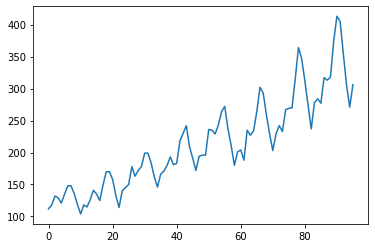

In [19]:
air.Passengers.plot()

### Time Series Decomposition Plot 

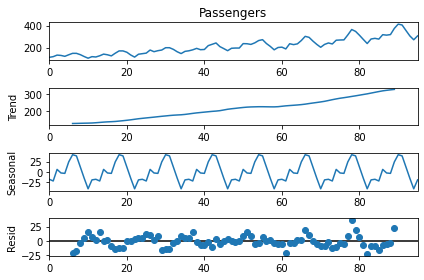

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(air.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

# Splitting data

In [22]:
train = air1.head(76)
test = air1.tail(20)
predict_data= air1.tail(20)

In [23]:
#Linear Model
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t',data=train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

57.00014788256592

In [24]:
#Exponential

Exp = smf.ols('log_Passengers~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.62154394719422

In [25]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

58.494274639472664

In [26]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.2541343994949

In [27]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

39.75976633805621

In [28]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

137.6109085625654

In [29]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

11.784250178761205

In [30]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.784250
4,rmse_add_sea_quad,39.759766
1,rmse_Exp,46.621544
0,rmse_linear,57.000148
2,rmse_Quad,58.494275
3,rmse_add_sea,132.254134
5,rmse_Mult_sea,137.610909


## Predict for new time period

In [37]:
air1

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,271,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


In [39]:
#Build the model on entire data set
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = air1).fit()

In [43]:
pred_new = pd.Series(Mul_Add_sea.predict(air1))
pred_new

0     4.697298
1     4.712892
2     4.857256
3     4.821524
4     4.813365
        ...   
91    5.963853
92    5.856549
93    5.729468
94    5.599957
95    5.735181
Length: 96, dtype: float64

In [44]:
predict_data["forecasted_Passengers"] = pd.Series(pred_new)

C:\Users\ISHIKA\AppData\Local\Temp/ipykernel_21948/2360942681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data["forecasted_Passengers"] = pd.Series(pred_new)


In [45]:
predict_data

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers,forecasted_Passengers
76,270,0,0,0,0,0,0,0,0,1,0,0,0,77,5929,5.598422,5.609340
77,315,0,0,0,0,0,0,1,0,0,0,0,0,78,6084,5.752573,5.721737
78,364,0,0,0,0,0,1,0,0,0,0,0,0,79,6241,5.897154,5.822781
79,347,0,1,0,0,0,0,0,0,0,0,0,0,80,6400,5.849325,5.831190
80,312,0,0,0,0,0,0,0,0,0,0,0,1,81,6561,5.743003,5.723887
81,274,0,0,0,0,0,0,0,0,0,0,1,0,82,6724,5.613128,5.596806
82,237,0,0,0,0,0,0,0,0,0,1,0,0,83,6889,5.468060,5.467294
83,278,0,0,1,0,0,0,0,0,0,0,0,0,84,7056,5.627621,5.602519
84,284,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,5.648974,5.625936
85,277,0,0,0,1,0,0,0,0,0,0,0,0,86,7396,5.624018,5.641529
